<h1 align="center">Allergen Chip Challenge💡</h1>

<h2 align="center">Exploratory Data Analysis📈</h3>

In [1]:
!pip install openpyxl --quiet

In [2]:
import os
import gc

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import IFrame
from tqdm import tqdm
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

#from pandas_profiling import ProfileReport

<h4 align="center">◀Loading data</h4>

In [3]:
DATA_DIR = './data/'

In [4]:
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'), low_memory=False)
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'), low_memory=False)

allergen_maps = pd.read_excel('./Allergen_maps.xlsx')

In [5]:
#Let's look at the data
train.head()

,Patient_ID,Chip_Code,Chip_Type,Chip_Image_Name,Age,Gender,Blood_Month_sample,French_Residence_Department,French_Region,Rural_or_urban_area,Sensitization,Food_Type_0,Treatment_of_rhinitis,Treatment_of_athsma,Age_of_onsets,Skin_Symptoms,General_cofactors,Treatment_of_atopic_dematitis,Act_d_1,Act_d_2,Act_d_5,Act_d_8,Aln_g_1,Alt_a_1,Alt_a_6,Amb_a_1,Ana_o_2,Ani_s_1,Ani_s_3,Api_g_1,Api_m_1,Api_m_4,Ara_h_1,Ara_h_2,Ara_h_3,Ara_h_6,Ara_h_8,Ara_h_9,Art_v_1,Art_v_3,Asp_f_1,Asp_f_3,Asp_f_6,Ber_e_1,Bet_v_1,Bet_v_2,Bet_v_4,Bla_g_1,Bla_g_2,Bla_g_5,Bla_g_7,Blo_t_5,Bos_d_4,Bos_d_5,Bos_d_6,Bos_d_8,Bos_d_Lactoferrin,Can_f_1,Can_f_2,Can_f_3,Can_f_5,Che_a_1,Cla_h_8,Cor_a_1.0101,Cor_a_1.0401,Cor_a_8,Cor_a_9,Cry_j_1,Cup_a_1,Cyn_d_1,Der_f_1,Der_f_2,Der_p_1,Der_p_10,Der_p_2,Equ_c_1,Equ_c_3,Fag_e_2,Fel_d_1,Fel_d_2,Fel_d_4,Gad_c_1,Gal_d_1,Gal_d_2,Gal_d_3,Gal_d_5,Gly_m_4,Gly_m_5,Gly_m_6,Hev_b_1,Hev_b_3,Hev_b_5,Hev_b_6.01,Hev_b_8,Jug_r_1,Jug_r_2,Jug_r_3,Lep_d_2,Mal_d_1,Mer_a_1,Mus_m_1,MUXF3,Ole_e_1,Ole_e_7,Ole_e_9,Par_j_2,Pen_m_1,Pen_m_2,Pen_m_4,Phl_p_1,Phl_p_11,Phl_p_12,Phl_p_2,Phl_p_4,Phl_p_5,Phl_p_6,Phl_p_7,Pla_a_1,Pla_a_2,Pla_a_3,Pla_l_1,Pol_d_5,Pru_p_1,Pru_p_3,Sal_k_1,Ses_i_1,Tri_a_14,Tri_a_19.0101,Tri_a_aA_TI,Ves_v_5,Cor_a_14,Can_f_4,Hev_b_6,Der_p_23,Alpha-Gal,Ana_o_3,Can_f_6,Aca_m,Aca_s,Ach_d,Act_d_10,Ail_a,All_c,All_s,Aln_g_4,Ama_r,Amb_a,Amb_a_4,Ana_o,Api_g_2,Api_g_6,Api_m,Api_m_10,Ara_h_15,Arg_r_1,Art_v,Asp_f_4,Ave_s,Ber_e,Bet_v_6,Bla_g_4,Bla_g_9,Blo_t_10,Blo_t_21,Bos_d_2,Bos_d_meat,Bos_d_milk,Bro_pa,Cam_d,Can_f_Fd1,Can_f_male_urine,Can_s,Can_s_3,Cap_a,Cap_h_epithelia,Cap_h_milk,Car_c,Car_i,Car_p,Cav_p_1,Che_a,Che_q,Chi_spp.,Cic_a,Cit_s,Cla_h,Clu_h,Clu_h_1,Cor_a_1.0103,Cor_a_11,Cor_a_12_RUO,Cor_a_pollen,Cra_c_6,Cuc_m_2,Cuc_p,Cup_s,Cyn_d,Cyp_c_1,Dau_c,Dau_c_1,Der_p_11,Der_p_20,Der_p_21,Der_p_5,Der_p_7,Dol_spp,Equ_c_4,Equ_c_meat,Equ_c_milk,Fag_e,Fag_s_1,Fel_d_7,Fic_b,Fic_c,Fra_a_1+3,Fra_e,Fra_e_1,Gad_m,Gad_m_1,Gad_m_2+3,Gal_d_4,Gal_d_meat,Gal_d_white,Gal_d_yolk,Gly_d_2,Gly_m_8,Hel_a,Hev_b_11,Hev_b_6.02,Hom_g,Hom_s_LF,Hor_v,Jug_r_4,Jug_r_6,Jug_r_pollen,Jun_a,Len_c,Lit_s,Loc_m,Lol_p_1,Lol_spp.,Lup_a,Mac_i_2S_Albumin,Mac_inte,Mal_d_2,Mal_d_3,Mala_s_11,Mala_s_5,Mala_s_6,Man_i,Mel_g,Mes_a_1_RUO,Mor_r,Mus_a,Myt_e,Ole_e_7_RUO,Ori_v,Ory_c_1,Ory_c_2,Ory_c_3,Ory_s,Ory_meat,Ost_e,Ovi_a_epithelia,Ovi_a_meat,Ovi_a_milk,Pan_b,Pan_m,Pap_s,Pap_s_2S_Albumin,Par_j,Pas_n,Pec_spp.,Pen_ch,Pen_m_3,Per_a,Per_a_7,Pers_a,Pet_c,Pha_v,Phl_p_5.0101,Pho_d_2,Phod_s_1,Phr_c,Pim_a,Pis_s,Pis_v_1,Pis_v_2,Pis_v_3,Pis_v_4_RUO,Pla_l,Pol_d,Pop_n,Pru_av,Pru_du,Pru_p_7_RUO,Pyr_c,Raj_c,Raj_c_Parvalbumin,Rat_n,Rud_spp.,Sac_c,Sal_k,Sal_s,Sal_s_1,Sco_s,Sco_s_1,Sec_c_flour,Sec_c_pollen,Ses_i,Sin,Sin_a_1,Sol_spp.,Sol_t,Sola_l,Sola_l_6,Sus_d_1,Sus_d_epithelia,Sus_d_meat,Ten_m,Thu_a,Thu_a_1,Tri_a_19,Tri_fo,Tri_s,Tyr_p,Tyr_p_2,Ulm_c,Urt_d,Vac_m,Ves_v,Ves_v_1,Vit_v_1,Xip_g_1,Zea_m,Zea_m_14,Allergy_Present,Severe_Allergy,Respiratory_Allergy,Food_Allergy,Venom_Allergy,Type_of_Respiratory_Allergy_ARIA,Type_of_Respiratory_Allergy_CONJ,Type_of_Respiratory_Allergy_GINA,Type_of_Respiratory_Allergy_IGE_Pollen_Gram,Type_of_Respiratory_Allergy_IGE_Pollen_Herb,Type_of_Respiratory_Allergy_IGE_Pollen_Tree,Type_of_Respiratory_Allergy_IGE_Dander_Animals,Type_of_Respiratory_Allergy_IGE_Mite_Cockroach,Type_of_Respiratory_Allergy_IGE_Molds_Yeast,Type_of_Food_Allergy_Aromatics,Type_of_Food_Allergy_Other,Type_of_Food_Allergy_Cereals_&_Seeds,Type_of_Food_Allergy_Egg,Type_of_Food_Allergy_Fish,Type_of_Food_Allergy_Fruits_and_Vegetables,Type_of_Food_Allergy_Mammalian_Milk,Type_of_Food_Allergy_Oral_Syndrom,Type_of_Food_Allergy_Other_Legumes,Type_of_Food_Allergy_Peanut,Type_of_Food_Allergy_Shellfish,Type_of_Food_Allergy_TPO,Type_of_Food_Allergy_Tree_Nuts,Type_of_Venom_Allergy_ATCD_Venom,Type_of_Venom_Allergy_IGE_Venom
0,PCR0232,02AHX0C9,ALEX,02AHX0C9.bmp,15.0,0.0,7.0,deptGGG,regionF,1,1,NaN,9.0,0,0,0,0,0,0.0,0.00,0.0,NaN,0.00,0.00,0.00,0.01,0.0,0.0,0.0,0.00,0.00,NaN,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,

In [6]:
test.head()

,trustii_id,Patient_ID,Chip_Code,Chip_Type,Chip_Image_Name,Age,Gender,Blood_Month_sample,French_Residence_Department,French_Region,Rural_or_urban_area,Sensitization,Food_Type_0,Treatment_of_rhinitis,Treatment_of_athsma,Age_of_onsets,Skin_Symptoms,General_cofactors,Treatment_of_atopic_dematitis,Act_d_1,Act_d_2,Act_d_5,Act_d_8,Aln_g_1,Alt_a_1,Alt_a_6,Amb_a_1,Ana_o_2,Ani_s_1,Ani_s_3,Api_g_1,Api_m_1,Api_m_4,Ara_h_1,Ara_h_2,Ara_h_3,Ara_h_6,Ara_h_8,Ara_h_9,Art_v_1,Art_v_3,Asp_f_1,Asp_f_3,Asp_f_6,Ber_e_1,Bet_v_1,Bet_v_2,Bet_v_4,Bla_g_1,Bla_g_2,Bla_g_5,Bla_g_7,Blo_t_5,Bos_d_4,Bos_d_5,Bos_d_6,Bos_d_8,Bos_d_Lactoferrin,Can_f_1,Can_f_2,Can_f_3,Can_f_5,Che_a_1,Cla_h_8,Cor_a_1.0101,Cor_a_1.0401,Cor_a_8,Cor_a_9,Cry_j_1,Cup_a_1,Cyn_d_1,Der_f_1,Der_f_2,Der_p_1,Der_p_10,Der_p_2,Equ_c_1,Equ_c_3,Fag_e_2,Fel_d_1,Fel_d_2,Fel_d_4,Gad_c_1,Gal_d_1,Gal_d_2,Gal_d_3,Gal_d_5,Gly_m_4,Gly_m_5,Gly_m_6,Hev_b_1,Hev_b_3,Hev_b_5,Hev_b_6.01,Hev_b_8,Jug_r_1,Jug_r_2,Jug_r_3,Lep_d_2,Mal_d_1,Mer_a_1,Mus_m_1,MUXF3,Ole_e_1,Ole_e_7,Ole_e_9,Par_j_2,Pen_m_1,Pen_m_2,Pen_m_4,Phl_p_1,Phl_p_11,Phl_p_12,Phl_p_2,Phl_p_4,Phl_p_5,Phl_p_6,Phl_p_7,Pla_a_1,Pla_a_2,Pla_a_3,Pla_l_1,Pol_d_5,Pru_p_1,Pru_p_3,Sal_k_1,Ses_i_1,Tri_a_14,Tri_a_19.0101,Tri_a_aA_TI,Ves_v_5,Cor_a_14,Can_f_4,Hev_b_6,Der_p_23,Alpha-Gal,Ana_o_3,Can_f_6,Aca_m,Aca_s,Ach_d,Act_d_10,Ail_a,All_c,All_s,Aln_g_4,Ama_r,Amb_a,Amb_a_4,Ana_o,Api_g_2,Api_g_6,Api_m,Api_m_10,Ara_h_15,Arg_r_1,Art_v,Asp_f_4,Ave_s,Ber_e,Bet_v_6,Bla_g_4,Bla_g_9,Blo_t_10,Blo_t_21,Bos_d_2,Bos_d_meat,Bos_d_milk,Bro_pa,Cam_d,Can_f_Fd1,Can_f_male_urine,Can_s,Can_s_3,Cap_a,Cap_h_epithelia,Cap_h_milk,Car_c,Car_i,Car_p,Cav_p_1,Che_a,Che_q,Chi_spp.,Cic_a,Cit_s,Cla_h,Clu_h,Clu_h_1,Cor_a_1.0103,Cor_a_11,Cor_a_12_RUO,Cor_a_pollen,Cra_c_6,Cuc_m_2,Cuc_p,Cup_s,Cyn_d,Cyp_c_1,Dau_c,Dau_c_1,Der_p_11,Der_p_20,Der_p_21,Der_p_5,Der_p_7,Dol_spp,Equ_c_4,Equ_c_meat,Equ_c_milk,Fag_e,Fag_s_1,Fel_d_7,Fic_b,Fic_c,Fra_a_1+3,Fra_e,Fra_e_1,Gad_m,Gad_m_1,Gad_m_2+3,Gal_d_4,Gal_d_meat,Gal_d_white,Gal_d_yolk,Gly_d_2,Gly_m_8,Hel_a,Hev_b_11,Hev_b_6.02,Hom_g,Hom_s_LF,Hor_v,Jug_r_4,Jug_r_6,Jug_r_pollen,Jun_a,Len_c,Lit_s,Loc_m,Lol_p_1,Lol_spp.,Lup_a,Mac_i_2S_Albumin,Mac_inte,Mal_d_2,Mal_d_3,Mala_s_11,Mala_s_5,Mala_s_6,Man_i,Mel_g,Mes_a_1_RUO,Mor_r,Mus_a,Myt_e,Ole_e_7_RUO,Ori_v,Ory_c_1,Ory_c_2,Ory_c_3,Ory_s,Ory_meat,Ost_e,Ovi_a_epithelia,Ovi_a_meat,Ovi_a_milk,Pan_b,Pan_m,Pap_s,Pap_s_2S_Albumin,Par_j,Pas_n,Pec_spp.,Pen_ch,Pen_m_3,Per_a,Per_a_7,Pers_a,Pet_c,Pha_v,Phl_p_5.0101,Pho_d_2,Phod_s_1,Phr_c,Pim_a,Pis_s,Pis_v_1,Pis_v_2,Pis_v_3,Pis_v_4_RUO,Pla_l,Pol_d,Pop_n,Pru_av,Pru_du,Pru_p_7_RUO,Pyr_c,Raj_c,Raj_c_Parvalbumin,Rat_n,Rud_spp.,Sac_c,Sal_k,Sal_s,Sal_s_1,Sco_s,Sco_s_1,Sec_c_flour,Sec_c_pollen,Ses_i,Sin,Sin_a_1,Sol_spp.,Sol_t,Sola_l,Sola_l_6,Sus_d_1,Sus_d_epithelia,Sus_d_meat,Ten_m,Thu_a,Thu_a_1,Tri_a_19,Tri_fo,Tri_s,Tyr_p,Tyr_p_2,Ulm_c,Urt_d,Vac_m,Ves_v,Ves_v_1,Vit_v_1,Xip_g_1,Zea_m,Zea_m_14
0,1,PMP0156,22 262C 3858,ISAC_V2,NaN,8.0,1.0,6.0,deptBBB,regionJ,9,1,NaN,0.0,9,4,0,"4, 7",0,0.0,0.00,0.0,0.0,0.13,0.0,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,0.00,0.0,0.0,0.0,0.78,0.00,0.0,0.0,0.00,0.0,0.20,0.0,3.44,0.0,0.0,0.0,0.0,0.0,0.0,3.25,0.00,0.00,0.0,0.0,0.0,4.24,0.00,0.0,0.0,0.0,0.0,0.0,1.01,0.0,0.00,0.20,0.00,1.80,36.37,37.08,40.99,0.00,29.11,0.0,0.0,0.0,2.22,0.0,0.53,0.0,0.00,0.00,0.00,0.0,0.62,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.00,NaN,0.0,0.69,1.44,0.0,0.09,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,27.81,0.17,0.0,0.00,0.24,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.63,0.00,0.0,0.00,0.0,0.0,0.0,NaN,0.00,1.86,0.0,0.14,0.00,0.00,2.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### 📢 As per my observation of the data:
- Train and Test have different distribution
- To reduce the difference I am droping the `rows` that have `9` in `ANY` of the target columns

In [7]:
# Rows that have 9 in the target columns
mask = train.iloc[:, 336:]  == 9
mask_any = mask.any(axis=1)

# Filter the DataFrame to discard the rows where any of the target columns has the value 9
train = train[~mask_any].reset_index(drop=True)

# Droping the row that has incorrect entry.
train =  train.drop(train[train['Age_of_onsets'] == '2, 3'].index)
train['Age_of_onsets'] = train['Age_of_onsets'].astype(int)

# Seperating Features from Targets
X = train.iloc[:, :336] 
y = train.iloc[:, 336:]
target_columns = y.columns

X_test = test.drop('trustii_id', axis = 1)

del train, test, mask, mask_any
gc.collect()

10

In [8]:
X.shape, X_test.shape

((1355, 336), (586, 336))

In [9]:
X_test.head()

,Patient_ID,Chip_Code,Chip_Type,Chip_Image_Name,Age,Gender,Blood_Month_sample,French_Residence_Department,French_Region,Rural_or_urban_area,Sensitization,Food_Type_0,Treatment_of_rhinitis,Treatment_of_athsma,Age_of_onsets,Skin_Symptoms,General_cofactors,Treatment_of_atopic_dematitis,Act_d_1,Act_d_2,Act_d_5,Act_d_8,Aln_g_1,Alt_a_1,Alt_a_6,Amb_a_1,Ana_o_2,Ani_s_1,Ani_s_3,Api_g_1,Api_m_1,Api_m_4,Ara_h_1,Ara_h_2,Ara_h_3,Ara_h_6,Ara_h_8,Ara_h_9,Art_v_1,Art_v_3,Asp_f_1,Asp_f_3,Asp_f_6,Ber_e_1,Bet_v_1,Bet_v_2,Bet_v_4,Bla_g_1,Bla_g_2,Bla_g_5,Bla_g_7,Blo_t_5,Bos_d_4,Bos_d_5,Bos_d_6,Bos_d_8,Bos_d_Lactoferrin,Can_f_1,Can_f_2,Can_f_3,Can_f_5,Che_a_1,Cla_h_8,Cor_a_1.0101,Cor_a_1.0401,Cor_a_8,Cor_a_9,Cry_j_1,Cup_a_1,Cyn_d_1,Der_f_1,Der_f_2,Der_p_1,Der_p_10,Der_p_2,Equ_c_1,Equ_c_3,Fag_e_2,Fel_d_1,Fel_d_2,Fel_d_4,Gad_c_1,Gal_d_1,Gal_d_2,Gal_d_3,Gal_d_5,Gly_m_4,Gly_m_5,Gly_m_6,Hev_b_1,Hev_b_3,Hev_b_5,Hev_b_6.01,Hev_b_8,Jug_r_1,Jug_r_2,Jug_r_3,Lep_d_2,Mal_d_1,Mer_a_1,Mus_m_1,MUXF3,Ole_e_1,Ole_e_7,Ole_e_9,Par_j_2,Pen_m_1,Pen_m_2,Pen_m_4,Phl_p_1,Phl_p_11,Phl_p_12,Phl_p_2,Phl_p_4,Phl_p_5,Phl_p_6,Phl_p_7,Pla_a_1,Pla_a_2,Pla_a_3,Pla_l_1,Pol_d_5,Pru_p_1,Pru_p_3,Sal_k_1,Ses_i_1,Tri_a_14,Tri_a_19.0101,Tri_a_aA_TI,Ves_v_5,Cor_a_14,Can_f_4,Hev_b_6,Der_p_23,Alpha-Gal,Ana_o_3,Can_f_6,Aca_m,Aca_s,Ach_d,Act_d_10,Ail_a,All_c,All_s,Aln_g_4,Ama_r,Amb_a,Amb_a_4,Ana_o,Api_g_2,Api_g_6,Api_m,Api_m_10,Ara_h_15,Arg_r_1,Art_v,Asp_f_4,Ave_s,Ber_e,Bet_v_6,Bla_g_4,Bla_g_9,Blo_t_10,Blo_t_21,Bos_d_2,Bos_d_meat,Bos_d_milk,Bro_pa,Cam_d,Can_f_Fd1,Can_f_male_urine,Can_s,Can_s_3,Cap_a,Cap_h_epithelia,Cap_h_milk,Car_c,Car_i,Car_p,Cav_p_1,Che_a,Che_q,Chi_spp.,Cic_a,Cit_s,Cla_h,Clu_h,Clu_h_1,Cor_a_1.0103,Cor_a_11,Cor_a_12_RUO,Cor_a_pollen,Cra_c_6,Cuc_m_2,Cuc_p,Cup_s,Cyn_d,Cyp_c_1,Dau_c,Dau_c_1,Der_p_11,Der_p_20,Der_p_21,Der_p_5,Der_p_7,Dol_spp,Equ_c_4,Equ_c_meat,Equ_c_milk,Fag_e,Fag_s_1,Fel_d_7,Fic_b,Fic_c,Fra_a_1+3,Fra_e,Fra_e_1,Gad_m,Gad_m_1,Gad_m_2+3,Gal_d_4,Gal_d_meat,Gal_d_white,Gal_d_yolk,Gly_d_2,Gly_m_8,Hel_a,Hev_b_11,Hev_b_6.02,Hom_g,Hom_s_LF,Hor_v,Jug_r_4,Jug_r_6,Jug_r_pollen,Jun_a,Len_c,Lit_s,Loc_m,Lol_p_1,Lol_spp.,Lup_a,Mac_i_2S_Albumin,Mac_inte,Mal_d_2,Mal_d_3,Mala_s_11,Mala_s_5,Mala_s_6,Man_i,Mel_g,Mes_a_1_RUO,Mor_r,Mus_a,Myt_e,Ole_e_7_RUO,Ori_v,Ory_c_1,Ory_c_2,Ory_c_3,Ory_s,Ory_meat,Ost_e,Ovi_a_epithelia,Ovi_a_meat,Ovi_a_milk,Pan_b,Pan_m,Pap_s,Pap_s_2S_Albumin,Par_j,Pas_n,Pec_spp.,Pen_ch,Pen_m_3,Per_a,Per_a_7,Pers_a,Pet_c,Pha_v,Phl_p_5.0101,Pho_d_2,Phod_s_1,Phr_c,Pim_a,Pis_s,Pis_v_1,Pis_v_2,Pis_v_3,Pis_v_4_RUO,Pla_l,Pol_d,Pop_n,Pru_av,Pru_du,Pru_p_7_RUO,Pyr_c,Raj_c,Raj_c_Parvalbumin,Rat_n,Rud_spp.,Sac_c,Sal_k,Sal_s,Sal_s_1,Sco_s,Sco_s_1,Sec_c_flour,Sec_c_pollen,Ses_i,Sin,Sin_a_1,Sol_spp.,Sol_t,Sola_l,Sola_l_6,Sus_d_1,Sus_d_epithelia,Sus_d_meat,Ten_m,Thu_a,Thu_a_1,Tri_a_19,Tri_fo,Tri_s,Tyr_p,Tyr_p_2,Ulm_c,Urt_d,Vac_m,Ves_v,Ves_v_1,Vit_v_1,Xip_g_1,Zea_m,Zea_m_14
0,PMP0156,22 262C 3858,ISAC_V2,NaN,8.0,1.0,6.0,deptBBB,regionJ,9,1,NaN,0.0,9,4,0,"4, 7",0,0.0,0.00,0.0,0.0,0.13,0.0,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,0.00,0.0,0.0,0.0,0.78,0.00,0.0,0.0,0.00,0.0,0.20,0.0,3.44,0.0,0.0,0.0,0.0,0.0,0.0,3.25,0.00,0.00,0.0,0.0,0.0,4.24,0.00,0.0,0.0,0.0,0.0,0.0,1.01,0.0,0.00,0.20,0.00,1.80,36.37,37.08,40.99,0.00,29.11,0.0,0.0,0.0,2.22,0.0,0.53,0.0,0.00,0.00,0.00,0.0,0.62,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.00,NaN,0.0,0.69,1.44,0.0,0.09,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,27.81,0.17,0.0,0.00,0.24,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.63,0.00,0.0,0.00,0.0,0.0,0.0,NaN,0.00,1.86,0.0,0.14,0.00,0.00,2.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [10]:
y.head()

,Allergy_Present,Severe_Allergy,Respiratory_Allergy,Food_Allergy,Venom_Allergy,Type_of_Respiratory_Allergy_ARIA,Type_of_Respiratory_Allergy_CONJ,Type_of_Respiratory_Allergy_GINA,Type_of_Respiratory_Allergy_IGE_Pollen_Gram,Type_of_Respiratory_Allergy_IGE_Pollen_Herb,Type_of_Respiratory_Allergy_IGE_Pollen_Tree,Type_of_Respiratory_Allergy_IGE_Dander_Animals,Type_of_Respiratory_Allergy_IGE_Mite_Cockroach,Type_of_Respiratory_Allergy_IGE_Molds_Yeast,Type_of_Food_Allergy_Aromatics,Type_of_Food_Allergy_Other,Type_of_Food_Allergy_Cereals_&_Seeds,Type_of_Food_Allergy_Egg,Type_of_Food_Allergy_Fish,Type_of_Food_Allergy_Fruits_and_Vegetables,Type_of_Food_Allergy_Mammalian_Milk,Type_of_Food_Allergy_Oral_Syndrom,Type_of_Food_Allergy_Other_Legumes,Type_of_Food_Allergy_Peanut,Type_of_Food_Allergy_Shellfish,Type_of_Food_Allergy_TPO,Type_of_Food_Allergy_Tree_Nuts,Type_of_Venom_Allergy_ATCD_Venom,Type_of_Venom_Allergy_IGE_Venom
0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Let's see some stats
X.describe()

,Age,Gender,Blood_Month_sample,Rural_or_urban_area,Sensitization,Treatment_of_rhinitis,Age_of_onsets,Skin_Symptoms,Act_d_1,Act_d_2,Act_d_5,Act_d_8,Aln_g_1,Alt_a_1,Alt_a_6,Amb_a_1,Ana_o_2,Ani_s_1,Ani_s_3,Api_g_1,Api_m_1,Api_m_4,Ara_h_1,Ara_h_2,Ara_h_3,Ara_h_6,Ara_h_8,Ara_h_9,Art_v_1,Art_v_3,Asp_f_1,Asp_f_3,Asp_f_6,Ber_e_1,Bet_v_1,Bet_v_2,Bet_v_4,Bla_g_1,Bla_g_2,Bla_g_5,Bla_g_7,Blo_t_5,Bos_d_4,Bos_d_5,Bos_d_6,Bos_d_8,Bos_d_Lactoferrin,Can_f_1,Can_f_2,Can_f_3,Can_f_5,Che_a_1,Cla_h_8,Cor_a_1.0101,Cor_a_1.0401,Cor_a_8,Cor_a_9,Cry_j_1,Cup_a_1,Cyn_d_1,Der_f_1,Der_f_2,Der_p_1,Der_p_10,Der_p_2,Equ_c_1,Equ_c_3,Fag_e_2,Fel_d_1,Fel_d_2,Fel_d_4,Gad_c_1,Gal_d_1,Gal_d_2,Gal_d_3,Gal_d_5,Gly_m_4,Gly_m_5,Gly_m_6,Hev_b_1,Hev_b_3,Hev_b_5,Hev_b_6.01,Hev_b_8,Jug_r_1,Jug_r_2,Jug_r_3,Lep_d_2,Mal_d_1,Mer_a_1,Mus_m_1,MUXF3,Ole_e_1,Ole_e_7,Ole_e_9,Par_j_2,Pen_m_1,Pen_m_2,Pen_m_4,Phl_p_1,Phl_p_11,Phl_p_12,Phl_p_2,Phl_p_4,Phl_p_5,Phl_p_6,Phl_p_7,Pla_a_1,Pla_a_2,Pla_a_3,Pla_l_1,Pol_d_5,Pru_p_1,Pru_p_3,Sal_k_1,Ses_i_1,Tri_a_14,Tri_a_19.0101,Tri_a_aA_TI,Ves_v_5,Cor_a_14,Can_f_4,Hev_b_6,Der_p_23,Alpha-Gal,Ana_o_3,Can_f_6,Aca_m,Aca_s,Ach_d,Act_d_10,Ail_a,All_c,All_s,Aln_g_4,Ama_r,Amb_a,Amb_a_4,Ana_o,Api_g_2,Api_g_6,Api_m,Api_m_10,Ara_h_15,Arg_r_1,Art_v,Asp_f_4,Ave_s,Ber_e,Bet_v_6,Bla_g_4,Bla_g_9,Blo_t_10,Blo_t_21,Bos_d_2,Bos_d_meat,Bos_d_milk,Bro_pa,Cam_d,Can_f_Fd1,Can_f_male_urine,Can_s,Can_s_3,Cap_a,Cap_h_epithelia,Cap_h_milk,Car_c,Car_i,Car_p,Cav_p_1,Che_a,Che_q,Chi_spp.,Cic_a,Cit_s,Cla_h,Clu_h,Clu_h_1,Cor_a_1.0103,Cor_a_11,Cor_a_12_RUO,Cor_a_pollen,Cra_c_6,Cuc_m_2,Cuc_p,Cup_s,Cyn_d,Cyp_c_1,Dau_c,Dau_c_1,Der_p_11,Der_p_20,Der_p_21,Der_p_5,Der_p_7,Dol_spp,Equ_c_4,Equ_c_meat,Equ_c_milk,Fag_e,Fag_s_1,Fel_d_7,Fic_b,Fic_c,Fra_a_1+3,Fra_e,Fra_e_1,Gad_m,Gad_m_1,Gad_m_2+3,Gal_d_4,Gal_d_meat,Gal_d_white,Gal_d_yolk,Gly_d_2,Gly_m_8,Hel_a,Hev_b_11,Hev_b_6.02,Hom_g,Hom_s_LF,Hor_v,Jug_r_4,Jug_r_6,Jug_r_pollen,Jun_a,Len_c,Lit_s,Loc_m,Lol_p_1,Lol_spp.,Lup_a,Mac_i_2S_Albumin,Mac_inte,Mal_d_2,Mal_d_3,Mala_s_11,Mala_s_5,Mala_s_6,Man_i,Mel_g,Mes_a_1_RUO,Mor_r,Mus_a,Myt_e,Ole_e_7_RUO,Ori_v,Ory_c_1,Ory_c_2,Ory_c_3,Ory_s,Ory_meat,Ost_e,Ovi_a_epithelia,Ovi_a_meat,Ovi_a_milk,Pan_b,Pan_m,Pap_s,Pap_s_2S_Albumin,Par_j,Pas_n,Pec_spp.,Pen_ch,Pen_m_3,Per_a,Per_a_7,Pers_a,Pet_c,Pha_v,Phl_p_5.0101,Pho_d_2,Phod_s_1,Phr_c,Pim_a,Pis_s,Pis_v_1,Pis_v_2,Pis_v_3,Pis_v_4_RUO,Pla_l,Pol_d,Pop_n,Pru_av,Pru_du,Pru_p_7_RUO,Pyr_c,Raj_c,Raj_c_Parvalbumin,Rat_n,Rud_spp.,Sac_c,Sal_k,Sal_s,Sal_s_1,Sco_s,Sco_s_1,Sec_c_flour,Sec_c_pollen,Ses_i,Sin,Sin_a_1,Sol_spp.,Sol_t,Sola_l,Sola_l_6,Sus_d_1,Sus_d_epithelia,Sus_d_meat,Ten_m,Thu_a,Thu_a_1,Tri_a_19,Tri_fo,Tri_s,Tyr_p,Tyr_p_2,Ulm_c,Urt_d,Vac_m,Ves_v,Ves_v_1,Vit_v_1,Xip_g_1,Zea_m,Zea_m_14
count,1355.000000,1355.000000,1354.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,950.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,984.000000,579.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,950.000000,1355.000000,1355.000000,1355.000000,950.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,950.000000,1355.000000,1355.000000,1355.000000,950.000000,1355.000000,1355.000000,950.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,950.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,579.000000,1355.000000,1355.00000,984.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,950.000000,1355.000000,950.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,950.000000,1355.000000,1355.000000,950.000000,950.000000,1355.000000,1355.000000,1355.000000,984.000000,1

In [12]:
X_test.describe()

,Age,Gender,Blood_Month_sample,Rural_or_urban_area,Sensitization,Treatment_of_rhinitis,Age_of_onsets,Skin_Symptoms,Act_d_1,Act_d_2,Act_d_5,Act_d_8,Aln_g_1,Alt_a_1,Alt_a_6,Amb_a_1,Ana_o_2,Ani_s_1,Ani_s_3,Api_g_1,Api_m_1,Api_m_4,Ara_h_1,Ara_h_2,Ara_h_3,Ara_h_6,Ara_h_8,Ara_h_9,Art_v_1,Art_v_3,Asp_f_1,Asp_f_3,Asp_f_6,Ber_e_1,Bet_v_1,Bet_v_2,Bet_v_4,Bla_g_1,Bla_g_2,Bla_g_5,Bla_g_7,Blo_t_5,Bos_d_4,Bos_d_5,Bos_d_6,Bos_d_8,Bos_d_Lactoferrin,Can_f_1,Can_f_2,Can_f_3,Can_f_5,Che_a_1,Cla_h_8,Cor_a_1.0101,Cor_a_1.0401,Cor_a_8,Cor_a_9,Cry_j_1,Cup_a_1,Cyn_d_1,Der_f_1,Der_f_2,Der_p_1,Der_p_10,Der_p_2,Equ_c_1,Equ_c_3,Fag_e_2,Fel_d_1,Fel_d_2,Fel_d_4,Gad_c_1,Gal_d_1,Gal_d_2,Gal_d_3,Gal_d_5,Gly_m_4,Gly_m_5,Gly_m_6,Hev_b_1,Hev_b_3,Hev_b_5,Hev_b_6.01,Hev_b_8,Jug_r_1,Jug_r_2,Jug_r_3,Lep_d_2,Mal_d_1,Mer_a_1,Mus_m_1,MUXF3,Ole_e_1,Ole_e_7,Ole_e_9,Par_j_2,Pen_m_1,Pen_m_2,Pen_m_4,Phl_p_1,Phl_p_11,Phl_p_12,Phl_p_2,Phl_p_4,Phl_p_5,Phl_p_6,Phl_p_7,Pla_a_1,Pla_a_2,Pla_a_3,Pla_l_1,Pol_d_5,Pru_p_1,Pru_p_3,Sal_k_1,Ses_i_1,Tri_a_14,Tri_a_19.0101,Tri_a_aA_TI,Ves_v_5,Cor_a_14,Can_f_4,Hev_b_6,Der_p_23,Alpha-Gal,Ana_o_3,Can_f_6,Aca_m,Aca_s,Ach_d,Act_d_10,Ail_a,All_c,All_s,Aln_g_4,Ama_r,Amb_a,Amb_a_4,Ana_o,Api_g_2,Api_g_6,Api_m,Api_m_10,Ara_h_15,Arg_r_1,Art_v,Asp_f_4,Ave_s,Ber_e,Bet_v_6,Bla_g_4,Bla_g_9,Blo_t_10,Blo_t_21,Bos_d_2,Bos_d_meat,Bos_d_milk,Bro_pa,Cam_d,Can_f_Fd1,Can_f_male_urine,Can_s,Can_s_3,Cap_a,Cap_h_epithelia,Cap_h_milk,Car_c,Car_i,Car_p,Cav_p_1,Che_a,Che_q,Chi_spp.,Cic_a,Cit_s,Cla_h,Clu_h,Clu_h_1,Cor_a_1.0103,Cor_a_11,Cor_a_12_RUO,Cor_a_pollen,Cra_c_6,Cuc_m_2,Cuc_p,Cup_s,Cyn_d,Cyp_c_1,Dau_c,Dau_c_1,Der_p_11,Der_p_20,Der_p_21,Der_p_5,Der_p_7,Dol_spp,Equ_c_4,Equ_c_meat,Equ_c_milk,Fag_e,Fag_s_1,Fel_d_7,Fic_b,Fic_c,Fra_a_1+3,Fra_e,Fra_e_1,Gad_m,Gad_m_1,Gad_m_2+3,Gal_d_4,Gal_d_meat,Gal_d_white,Gal_d_yolk,Gly_d_2,Gly_m_8,Hel_a,Hev_b_11,Hev_b_6.02,Hom_g,Hom_s_LF,Hor_v,Jug_r_4,Jug_r_6,Jug_r_pollen,Jun_a,Len_c,Lit_s,Loc_m,Lol_p_1,Lol_spp.,Lup_a,Mac_i_2S_Albumin,Mac_inte,Mal_d_2,Mal_d_3,Mala_s_11,Mala_s_5,Mala_s_6,Man_i,Mel_g,Mes_a_1_RUO,Mor_r,Mus_a,Myt_e,Ole_e_7_RUO,Ori_v,Ory_c_1,Ory_c_2,Ory_c_3,Ory_s,Ory_meat,Ost_e,Ovi_a_epithelia,Ovi_a_meat,Ovi_a_milk,Pan_b,Pan_m,Pap_s,Pap_s_2S_Albumin,Par_j,Pas_n,Pec_spp.,Pen_ch,Pen_m_3,Per_a,Per_a_7,Pers_a,Pet_c,Pha_v,Phl_p_5.0101,Pho_d_2,Phod_s_1,Phr_c,Pim_a,Pis_s,Pis_v_1,Pis_v_2,Pis_v_3,Pis_v_4_RUO,Pla_l,Pol_d,Pop_n,Pru_av,Pru_du,Pru_p_7_RUO,Pyr_c,Raj_c,Raj_c_Parvalbumin,Rat_n,Rud_spp.,Sac_c,Sal_k,Sal_s,Sal_s_1,Sco_s,Sco_s_1,Sec_c_flour,Sec_c_pollen,Ses_i,Sin,Sin_a_1,Sol_spp.,Sol_t,Sola_l,Sola_l_6,Sus_d_1,Sus_d_epithelia,Sus_d_meat,Ten_m,Thu_a,Thu_a_1,Tri_a_19,Tri_fo,Tri_s,Tyr_p,Tyr_p_2,Ulm_c,Urt_d,Vac_m,Ves_v,Ves_v_1,Vit_v_1,Xip_g_1,Zea_m,Zea_m_14
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,409.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,426.000000,249.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,409.000000,586.000000,586.000000,586.000000,409.000000,586.000000,586.000000,586.000000,586.000000,586.000000,409.000000,586.000000,586.000000,586.000000,409.000000,586.000000,586.000000,409.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,409.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,249.000000,586.000000,586.000000,426.000000,586.000000,586.000000,586.000000,586.000000,586.000000,409.000000,586.000000,409.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,409.000000,586.000000,586.000000,409.000000,409.000000,586.000000,586.000000,586.000000,426.000000,586.000000,586.000000,426.000000,409.000000,586.000000,586.000000,586.000000,586.000000,409.

#### 📢 Data has many missing values. Will drop `Food_Type_0` as it only has two non-missing instances

In [13]:
# new = train[train['Chip_Type'] == 'ALEX'].iloc[:, 18:].isnull().sum() # Keeping only allergen columns
# new[new.values > 0].shape[1]  #Missing values for that particular chip type

In [14]:
# tmp = train.iloc[:, 18:].isnull().sum()
# tmp[tmp.values == 0].shape[0]  #No missing values for 3 types of chips

#### 📢 Missing values have some patterns:
- There are some allergens that are measurable by only ONE `chip_type` ex: Last allergen columns are measured only by `ALEX`
- Based on this I made a table below that shows Chipe_Type and number of missing allergen `Columns`.

| Chip_Type | Number of columns with missing values |
|---------------|---------------|
| ALEX      | 18       | 
| ISAC_V1       | 206      | 
| ISAC_V2      | 206       |

- There are `91` allergen feature columns that have `all` the values for 3 types of chips


<h3 align="center">Some Graphs📈</h3>

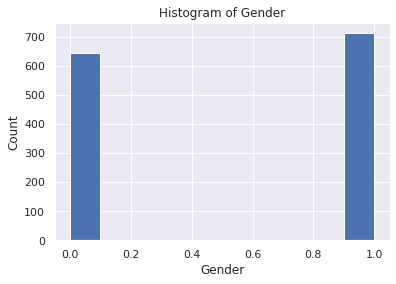

In [15]:
sns.set()
ax = X.Gender.plot(kind='hist')
ax.set_title('Histogram of Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
plt.show()

#### 📢 Balanced data in terms of `Gender`.

In [16]:
male_data = X[X['Gender'] == 1.0]
female_data = X[X['Gender'] == 0.0]

# Function to plot various features by Gender
def plot_hist_by_gender(col): 
    ax = male_data[col].plot(kind='hist', label='Male', bins=50, alpha=0.5)
    ax = female_data[col].plot(kind='hist', label='Female',  bins=50, alpha=0.5)
    ax.set_title(f'Histogram of {col} by Gender')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')
    plt.legend()
    plt.show()

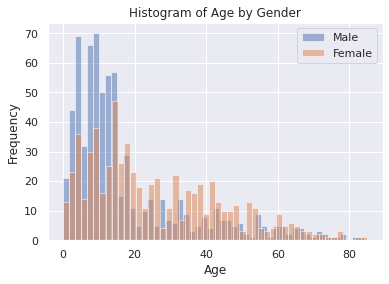

In [17]:
plot_hist_by_gender('Age')

#### 📢 Most of the observations in the dataset are of `under age 20`.
#### 📢 There is difference in the distribution for `Male` and `Female`.

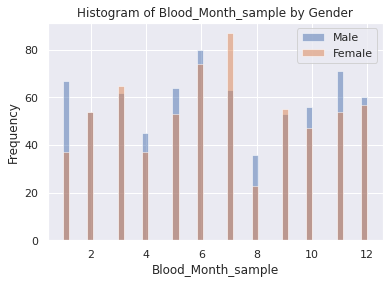

In [18]:
plot_hist_by_gender('Blood_Month_sample')

#### 📢 Uniformity over the Blood sample months for males and females
#### 📢 There are more instances from `month 7(July)`.

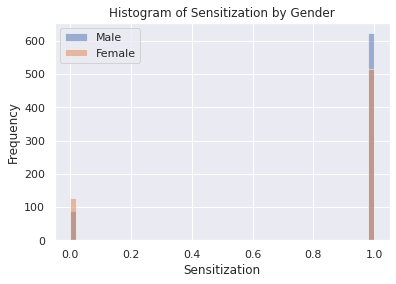

In [19]:
plot_hist_by_gender('Sensitization')

#### 📢 `Males` are more Sensitized than `Females`.

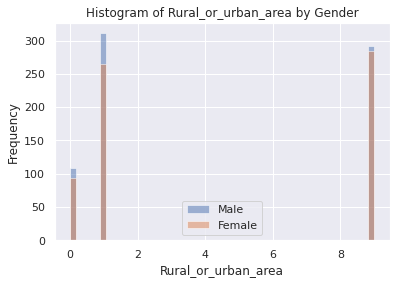

In [20]:
plot_hist_by_gender('Rural_or_urban_area')

#### Generate Some Reports about the datasets using pandas profiling library

In [21]:
#from pandas_profiling import ProfileReport

In [22]:
# report = ProfileReport(X, title="Allergen Chip Train data Report", explorative=True, minimal=True)
# report.to_file('processed_data/Allergen_Chip_Train_data_Report.html')

In [23]:
# report = ProfileReport(X_test, title="Allergen Chip Test data Report", explorative=True, minimal=True)
# report.to_file('processed_data/Allergen_Chip_Test_data_Report.html')

In [24]:
#IFrame(src='processed_data/Allergen_Chip_Train_data_Report.html', width='100%', height=500)

In [25]:
#IFrame(src='processed_data/Allergen_Chip_Test_data_Report.html', width='100%', height=500)

#### Based on the observations from the `Reports`, `Drop` list columns are droppped and `Outliers` columns are transformed

In [26]:
Drop = ['Hev_b_1', 'Hev_b_3', 'Hev_b_5', 'Hev_b_6.01', 'Hev_b_8', 'Hev_b_6', 'Ovi_a_epithelia', 'Cor_a_12_RUO',
        'Mes_a_1_RUO', 'Ole_e_7_RUO', 'Pis_v_4_RUO', 'Pru_p_7_RUO']

In [27]:
Outliers = ['Act_d_2', 'Act_d_5', 'Alt_a_6', 'Ani_s_1', 'Api_m_4', 'Asp_f_3', 'Ber_e_1', 'Bla_g_1', 'Bla_g_2',
 'Bla_g_5', 'Cla_h_8', 'Fag_e_2', 'Gal_d_5', 'Gly_m_5', 'Jug_r_3', 'Ole_e_7', 'Ole_e_9', 'Par_j_2', 'Pla_a_2', 
 'Sal_k_1', 'Tri_a_14', 'Equ_c_4']

In [28]:
X = X.drop(columns=Drop)
X_test = X_test.drop(columns=Drop)

In [29]:
allergen_maps = allergen_maps[~allergen_maps.isin(Drop).any(axis=1)].reset_index(drop=True)

In [30]:
for col in Outliers:
    second_highest = X[col].nlargest(2).iloc[-1]
    X[col] = X[col].replace(np.nanmax(X[col]), second_highest)

<h3 align="center">Pre-Processing and feature engineering⚙</h3>

#### To extract `text` from `Patient_ID` as there are finite text categories.

In [31]:
def get_text(df, col):
    df[col+'_txt'] = df[col].str.extractall('([a-zA-Z]+)')[0].values # Extract Text
    return df

#### This Transformation is interesting: There are patients `under multiple diagnotics`, so I created new columns for all treatment types and `replaced specific entry with 1` if the patient has gone under that particular treatment as shown below:

![](transform.PNG)

In [32]:
one_hot_mappings = {'Treatment_of_rhinitis': 6, 'Treatment_of_athsma': 12, 'General_cofactors': 14, 
                    'Treatment_of_atopic_dematitis': 9}

def expand_categorical_columns(df, cols):
    for col in tqdm(cols):
        # Create column names such that it has treatment type and specific subtreatment type
        column_names = [col+'_0', col+'_9']
        column_names.extend([col+'_'+str(i) for i in range(1, one_hot_mappings[col]) if i != 9])
        
        # Initially we set all values to Zero for the new columns and replace specific value in the data with 1.
        df[column_names] = 0 
        
        # Create a temporary dataframe of a single column for convinience 
        tmp_df = df[[col]] 
        new_df = tmp_df[col].astype(str).str.split('[,.]', expand=True) # Split values by . and/or ,
        n_columns_of_new_df = new_df.shape[1]  # number of new columns created by spliting the categorical columns
        for idx, row in new_df.iterrows(): # For each row in the new dataframe
            for col_of_new_df in range(n_columns_of_new_df): # For each column in the new data frame
                value = new_df.iloc[idx, col_of_new_df] # We get the value present at that particular cell
                if value is not None: # If the value is not empty
                    if col == 'Treatment_of_rhinitis': # for dealing with 5.3, 1.0, 2.5 etc.
                        if col_of_new_df == 0: # Update everything for 1st column i.e 5, 1, 2 for 5.3, 1.0, 2.5
                            df.loc[idx, col+'_'+str(int(value)).strip()] = 1
                        else: # Update if the value is not 0 in the 2nd column i.e 3, 5 for 5.3, 1.0, 2.5
                            if int(value) != 0: # Update only true floats something like 3.5 and not for 1.0
                                df.loc[idx, col+'_'+str(int(value)).strip()] = 1
                    else: # Rest of the columns have categories like (1, 2), (4, 5, 6, 10) etc
                        df.loc[idx, col+'_'+str(int(value)).strip()] = 1 #Replace with 1 as the patient took that treatment
    return df

In [33]:
# For mapping the categories of the `Chip_Type` columns to numeric
def initial_preprpcessing(df):
    df['Chip_Type'] = df['Chip_Type'].map({'ISAC_V1' : 0, 'ISAC_V2' : 1, 'ALEX' : 2})
    #df['French_Residence_Department'] = preprocessing.LabelEncoder().fit_transform(df['French_Residence_Department'])
    df = expand_categorical_columns(df, one_hot_mappings.keys())
    df.Age = df.Age.clip(0, 85)
    return df

In [34]:
## For doing freuency encoding and text extraction
def feature_engineering(df):
    # Binning Age column
    # bin_edges = [0, 12, 18, 30, 50, 80]
    # df['Age_bins'] = pd.cut(df['Age'], bins=bin_edges, labels=False, include_lowest=True)
    df = get_text(df, 'Patient_ID')
    
    df = df.drop(['Patient_ID', 'Chip_Code', 'Chip_Image_Name', 'French_Residence_Department', 'Treatment_of_rhinitis',
                 'Treatment_of_rhinitis', 'Treatment_of_athsma', 'General_cofactors', 'Treatment_of_atopic_dematitis', 
                 'Food_Type_0'], axis=1) 
    return df

##### Combining train and test data for pre-processing and Feature Engineering

In [35]:
X['train'] = 1
X_test['train'] = 0 

In [36]:
#Combining both datasets for applying preprocessing 
full_data = pd.concat([X, X_test], axis=0).reset_index(drop=True) 
full_data.shape  #(1356 + 586, 325)

(1941, 325)

In [37]:
full_data_processed = initial_preprpcessing(full_data)
full_data_processed[full_data_processed['General_cofactors'] == '4, 5, 6, 7, 10']  #Sanity check

100%|██████████| 4/4 [00:01<00:00,  3.47it/s]


,Patient_ID,Chip_Code,Chip_Type,Chip_Image_Name,Age,Gender,Blood_Month_sample,French_Residence_Department,French_Region,Rural_or_urban_area,Sensitization,Food_Type_0,Treatment_of_rhinitis,Treatment_of_athsma,Age_of_onsets,Skin_Symptoms,General_cofactors,Treatment_of_atopic_dematitis,Act_d_1,Act_d_2,Act_d_5,Act_d_8,Aln_g_1,Alt_a_1,Alt_a_6,Amb_a_1,Ana_o_2,Ani_s_1,Ani_s_3,Api_g_1,Api_m_1,Api_m_4,Ara_h_1,Ara_h_2,Ara_h_3,Ara_h_6,Ara_h_8,Ara_h_9,Art_v_1,Art_v_3,Asp_f_1,Asp_f_3,Asp_f_6,Ber_e_1,Bet_v_1,Bet_v_2,Bet_v_4,Bla_g_1,Bla_g_2,Bla_g_5,Bla_g_7,Blo_t_5,Bos_d_4,Bos_d_5,Bos_d_6,Bos_d_8,Bos_d_Lactoferrin,Can_f_1,Can_f_2,Can_f_3,Can_f_5,Che_a_1,Cla_h_8,Cor_a_1.0101,Cor_a_1.0401,Cor_a_8,Cor_a_9,Cry_j_1,Cup_a_1,Cyn_d_1,Der_f_1,Der_f_2,Der_p_1,Der_p_10,Der_p_2,Equ_c_1,Equ_c_3,Fag_e_2,Fel_d_1,Fel_d_2,Fel_d_4,Gad_c_1,Gal_d_1,Gal_d_2,Gal_d_3,Gal_d_5,Gly_m_4,Gly_m_5,Gly_m_6,Jug_r_1,Jug_r_2,Jug_r_3,Lep_d_2,Mal_d_1,Mer_a_1,Mus_m_1,MUXF3,Ole_e_1,Ole_e_7,Ole_e_9,Par_j_2,Pen_m_1,Pen_m_2,Pen_m_4,Phl_p_1,Phl_p_11,Phl_p_12,Phl_p_2,Phl_p_4,Phl_p_5,Phl_p_6,Phl_p_7,Pla_a_1,Pla_a_2,Pla_a_3,Pla_l_1,Pol_d_5,Pru_p_1,Pru_p_3,Sal_k_1,Ses_i_1,Tri_a_14,Tri_a_19.0101,Tri_a_aA_TI,Ves_v_5,Cor_a_14,Can_f_4,Der_p_23,Alpha-Gal,Ana_o_3,Can_f_6,Aca_m,Aca_s,Ach_d,Act_d_10,Ail_a,All_c,All_s,Aln_g_4,Ama_r,Amb_a,Amb_a_4,Ana_o,Api_g_2,Api_g_6,Api_m,Api_m_10,Ara_h_15,Arg_r_1,Art_v,Asp_f_4,Ave_s,Ber_e,Bet_v_6,Bla_g_4,Bla_g_9,Blo_t_10,Blo_t_21,Bos_d_2,Bos_d_meat,Bos_d_milk,Bro_pa,Cam_d,Can_f_Fd1,Can_f_male_urine,Can_s,Can_s_3,Cap_a,Cap_h_epithelia,Cap_h_milk,Car_c,Car_i,Car_p,Cav_p_1,Che_a,Che_q,Chi_spp.,Cic_a,Cit_s,Cla_h,Clu_h,Clu_h_1,Cor_a_1.0103,Cor_a_11,Cor_a_pollen,Cra_c_6,Cuc_m_2,Cuc_p,Cup_s,Cyn_d,Cyp_c_1,Dau_c,Dau_c_1,Der_p_11,Der_p_20,Der_p_21,Der_p_5,Der_p_7,Dol_spp,Equ_c_4,Equ_c_meat,Equ_c_milk,Fag_e,Fag_s_1,Fel_d_7,Fic_b,Fic_c,Fra_a_1+3,Fra_e,Fra_e_1,Gad_m,Gad_m_1,Gad_m_2+3,Gal_d_4,Gal_d_meat,Gal_d_white,Gal_d_yolk,Gly_d_2,Gly_m_8,Hel_a,Hev_b_11,Hev_b_6.02,Hom_g,Hom_s_LF,Hor_v,Jug_r_4,Jug_r_6,Jug_r_pollen,Jun_a,Len_c,Lit_s,Loc_m,Lol_p_1,Lol_spp.,Lup_a,Mac_i_2S_Albumin,Mac_inte,Mal_d_2,Mal_d_3,Mala_s_11,Mala_s_5,Mala_s_6,Man_i,Mel_g,Mor_r,Mus_a,Myt_e,Ori_v,Ory_c_1,Ory_c_2,Ory_c_3,Ory_s,Ory_meat,Ost_e,Ovi_a_meat,Ovi_a_milk,Pan_b,Pan_m,Pap_s,Pap_s_2S_Albumin,Par_j,Pas_n,Pec_spp.,Pen_ch,Pen_m_3,Per_a,Per_a_7,Pers_a,Pet_c,Pha_v,Phl_p_5.0101,Pho_d_2,Phod_s_1,Phr_c,Pim_a,Pis_s,Pis_v_1,Pis_v_2,Pis_v_3,Pla_l,Pol_d,Pop_n,Pru_av,Pru_du,Pyr_c,Raj_c,Raj_c_Parvalbumin,Rat_n,Rud_spp.,Sac_c,Sal_k,Sal_s,Sal_s_1,Sco_s,Sco_s_1,Sec_c_flour,Sec_c_pollen,Ses_i,Sin,Sin_a_1,Sol_spp.,Sol_t,Sola_l,Sola_l_6,Sus_d_1,Sus_d_epithelia,Sus_d_meat,Ten_m,Thu_a,Thu_a_1,Tri_a_19,Tri_fo,Tri_s,Tyr_p,Tyr_p_2,Ulm_c,Urt_d,Vac_m,Ves_v,Ves_v_1,Vit_v_1,Xip_g_1,Zea_m,Zea_m_14,train,Treatment_of_rhinitis_0,Treatment_of_rhinitis_9,Treatment_of_rhinitis_1,Treatment_of_rhinitis_2,Treatment_of_rhinitis_3,Treatment_of_rhinitis_4,Treatment_of_rhinitis_5,Treatment_of_athsma_0,Treatment_of_athsma_9,Treatment_of_athsma_1,Treatment_of_athsma_2,Treatment_of_athsma_3,Treatment_of_athsma_4,Treatment_of_athsma_5,Treatment_of_athsma_6,Treatment_of_athsma_7,Treatment_of_athsma_8,Treatment_of_athsma_10,Treatment_of_athsma_11,General_cofactors_0,General_cofactors_9,General_cofactors_1,General_cofactors_2,General_cofactors_3,General_cofactors_4,General_cofactors_5,General_cofactors_6,General_cofactors_7,General_cofactors_8,General_cofactors_10,General_cofactors_11,General_cofactors_12,General_cofactors_13,Treatment_of_atopic_dematitis_0,Treatment_of_atopic_dematitis_9,Treatment_of_atopic_dematitis_1,Treatment_of_atopic_dematitis_2,Treatment_of_atopic_dematitis_3,Treatment_of_atopic_dematitis_4,Treatment_of_atopic_dematitis_5,Treatment_of_atopic_dematitis_6,Treatment_of_atopic_dematitis_7,Treatment_of_atopic_dematitis_8
581,PMP0114,21 264C 5731,1,NaN,13.0,0.0,6.0,deptLLL,regionJ,1,0,NaN,0.0,4,0,9,"4, 5, 6, 7, 10",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

#### 📢 Looks like the pre-processing has done a good job. Replacing the correspoding entries with 1's and rest are 0's

In [38]:
final_data = feature_engineering(full_data_processed)

final_data[['Rural_or_urban_area', 'Skin_Symptoms']] = final_data[['Rural_or_urban_area',
                                                                   'Skin_Symptoms']].replace({9: np.nan})

In [39]:
final_data = pd.get_dummies(final_data)
final_data.head()

,Chip_Type,Age,Gender,Blood_Month_sample,Rural_or_urban_area,Sensitization,Age_of_onsets,Skin_Symptoms,Act_d_1,Act_d_2,Act_d_5,Act_d_8,Aln_g_1,Alt_a_1,Alt_a_6,Amb_a_1,Ana_o_2,Ani_s_1,Ani_s_3,Api_g_1,Api_m_1,Api_m_4,Ara_h_1,Ara_h_2,Ara_h_3,Ara_h_6,Ara_h_8,Ara_h_9,Art_v_1,Art_v_3,Asp_f_1,Asp_f_3,Asp_f_6,Ber_e_1,Bet_v_1,Bet_v_2,Bet_v_4,Bla_g_1,Bla_g_2,Bla_g_5,Bla_g_7,Blo_t_5,Bos_d_4,Bos_d_5,Bos_d_6,Bos_d_8,Bos_d_Lactoferrin,Can_f_1,Can_f_2,Can_f_3,Can_f_5,Che_a_1,Cla_h_8,Cor_a_1.0101,Cor_a_1.0401,Cor_a_8,Cor_a_9,Cry_j_1,Cup_a_1,Cyn_d_1,Der_f_1,Der_f_2,Der_p_1,Der_p_10,Der_p_2,Equ_c_1,Equ_c_3,Fag_e_2,Fel_d_1,Fel_d_2,Fel_d_4,Gad_c_1,Gal_d_1,Gal_d_2,Gal_d_3,Gal_d_5,Gly_m_4,Gly_m_5,Gly_m_6,Jug_r_1,Jug_r_2,Jug_r_3,Lep_d_2,Mal_d_1,Mer_a_1,Mus_m_1,MUXF3,Ole_e_1,Ole_e_7,Ole_e_9,Par_j_2,Pen_m_1,Pen_m_2,Pen_m_4,Phl_p_1,Phl_p_11,Phl_p_12,Phl_p_2,Phl_p_4,Phl_p_5,Phl_p_6,Phl_p_7,Pla_a_1,Pla_a_2,Pla_a_3,Pla_l_1,Pol_d_5,Pru_p_1,Pru_p_3,Sal_k_1,Ses_i_1,Tri_a_14,Tri_a_19.0101,Tri_a_aA_TI,Ves_v_5,Cor_a_14,Can_f_4,Der_p_23,Alpha-Gal,Ana_o_3,Can_f_6,Aca_m,Aca_s,Ach_d,Act_d_10,Ail_a,All_c,All_s,Aln_g_4,Ama_r,Amb_a,Amb_a_4,Ana_o,Api_g_2,Api_g_6,Api_m,Api_m_10,Ara_h_15,Arg_r_1,Art_v,Asp_f_4,Ave_s,Ber_e,Bet_v_6,Bla_g_4,Bla_g_9,Blo_t_10,Blo_t_21,Bos_d_2,Bos_d_meat,Bos_d_milk,Bro_pa,Cam_d,Can_f_Fd1,Can_f_male_urine,Can_s,Can_s_3,Cap_a,Cap_h_epithelia,Cap_h_milk,Car_c,Car_i,Car_p,Cav_p_1,Che_a,Che_q,Chi_spp.,Cic_a,Cit_s,Cla_h,Clu_h,Clu_h_1,Cor_a_1.0103,Cor_a_11,Cor_a_pollen,Cra_c_6,Cuc_m_2,Cuc_p,Cup_s,Cyn_d,Cyp_c_1,Dau_c,Dau_c_1,Der_p_11,Der_p_20,Der_p_21,Der_p_5,Der_p_7,Dol_spp,Equ_c_4,Equ_c_meat,Equ_c_milk,Fag_e,Fag_s_1,Fel_d_7,Fic_b,Fic_c,Fra_a_1+3,Fra_e,Fra_e_1,Gad_m,Gad_m_1,Gad_m_2+3,Gal_d_4,Gal_d_meat,Gal_d_white,Gal_d_yolk,Gly_d_2,Gly_m_8,Hel_a,Hev_b_11,Hev_b_6.02,Hom_g,Hom_s_LF,Hor_v,Jug_r_4,Jug_r_6,Jug_r_pollen,Jun_a,Len_c,Lit_s,Loc_m,Lol_p_1,Lol_spp.,Lup_a,Mac_i_2S_Albumin,Mac_inte,Mal_d_2,Mal_d_3,Mala_s_11,Mala_s_5,Mala_s_6,Man_i,Mel_g,Mor_r,Mus_a,Myt_e,Ori_v,Ory_c_1,Ory_c_2,Ory_c_3,Ory_s,Ory_meat,Ost_e,Ovi_a_meat,Ovi_a_milk,Pan_b,Pan_m,Pap_s,Pap_s_2S_Albumin,Par_j,Pas_n,Pec_spp.,Pen_ch,Pen_m_3,Per_a,Per_a_7,Pers_a,Pet_c,Pha_v,Phl_p_5.0101,Pho_d_2,Phod_s_1,Phr_c,Pim_a,Pis_s,Pis_v_1,Pis_v_2,Pis_v_3,Pla_l,Pol_d,Pop_n,Pru_av,Pru_du,Pyr_c,Raj_c,Raj_c_Parvalbumin,Rat_n,Rud_spp.,Sac_c,Sal_k,Sal_s,Sal_s_1,Sco_s,Sco_s_1,Sec_c_flour,Sec_c_pollen,Ses_i,Sin,Sin_a_1,Sol_spp.,Sol_t,Sola_l,Sola_l_6,Sus_d_1,Sus_d_epithelia,Sus_d_meat,Ten_m,Thu_a,Thu_a_1,Tri_a_19,Tri_fo,Tri_s,Tyr_p,Tyr_p_2,Ulm_c,Urt_d,Vac_m,Ves_v,Ves_v_1,Vit_v_1,Xip_g_1,Zea_m,Zea_m_14,train,Treatment_of_rhinitis_0,Treatment_of_rhinitis_9,Treatment_of_rhinitis_1,Treatment_of_rhinitis_2,Treatment_of_rhinitis_3,Treatment_of_rhinitis_4,Treatment_of_rhinitis_5,Treatment_of_athsma_0,Treatment_of_athsma_9,Treatment_of_athsma_1,Treatment_of_athsma_2,Treatment_of_athsma_3,Treatment_of_athsma_4,Treatment_of_athsma_5,Treatment_of_athsma_6,Treatment_of_athsma_7,Treatment_of_athsma_8,Treatment_of_athsma_10,Treatment_of_athsma_11,General_cofactors_0,General_cofactors_9,General_cofactors_1,General_cofactors_2,General_cofactors_3,General_cofactors_4,General_cofactors_5,General_cofactors_6,General_cofactors_7,General_cofactors_8,General_cofactors_10,General_cofactors_11,General_cofactors_12,General_cofactors_13,Treatment_of_atopic_dematitis_0,Treatment_of_atopic_dematitis_9,Treatment_of_atopic_dematitis_1,Treatment_of_atopic_dematitis_2,Treatment_of_atopic_dematitis_3,Treatment_of_atopic_dematitis_4,Treatment_of_atopic_dematitis_5,Treatment_of_atopic_dematitis_6,Treatment_of_atopic_dematitis_7,Treatment_of_atopic_dematitis_8,French_Region_regionA,French_Region_regionB,French_Region_regionC,French_Region_regionD,French_Region_regionE,French_Region_regionF,French_Region_regionG,French_Region_regionH,French_Region_regionI,French_Region_regionJ,French_Region_regionK,French_Region_regionL,French_Region_regionM,French_Region_regionN,French_Region_regionO,Patient_ID_txt_FHB,Patient_ID_txt_GER,Patient_ID_txt_GJH,Patien

In [40]:
# Separating training and test sets
X = final_data[final_data['train'] == 1].reset_index(drop=True)
X_test = final_data[final_data['train'] == 0].reset_index(drop=True)

X = X.drop('train', axis = 1)

X_test = X_test.drop('train', axis = 1)

del full_data_processed, final_data, male_data, female_data 
gc.collect() #Free up Memory

17947

#### Row Based features

In [41]:
# Count how many 0's are there in each row
def count_zeros(series):
    return (series.isin([0.0, 0.00, 0])).sum()

In [42]:
# Calculate statitical values based on the rows
def calculate_statistics(series):
    mean = np.mean(series)
    median = np.nanmedian(series)
    std = np.std(series)
    max_val = np.max(series)
    return pd.Series([mean, median, std, max_val])

#### To capture the Global and Local trends in the target variables, I created new features by combining `Proteins` that corresponds to similar effects.

- Global: All the proteins corresponding to an allergy. ex. Respiratory
- Local: All the proteins corresponding to a sub allergy. ex. Respiratory allergy due to Tree Pollens

In [43]:
# Get Proteins corresponding to a particular type of route ex. Airway, Food etc (Basically we are grouping proteins)
def get_proteins(route):
    return allergen_maps[allergen_maps['Route'] == route]['Allergen'].str.strip().values

In [44]:
# Get statistical features using proteins that cause similar allergy. (Grouping and calculating stats)
def get_protein_features(df):
    for route in allergen_maps['Route'].str.strip().unique():
        global_proteins = get_proteins(route)
        df[f'{route}_max'] = np.nanmax(df[global_proteins], axis=1)
        df[f'{route}_min'] = np.nanmin(df[global_proteins], axis=1)
        df[f'{route}_mean'] = np.nanmean(df[global_proteins], axis=1)
        df[f'{route}_sum'] = np.nansum(df[global_proteins], axis=1)        
        df[f'{route}_median'] = np.nanmedian(df[global_proteins], axis=1)
        df[f'{route}_std'] = np.nanstd(df[global_proteins], axis=1)
        local_df = allergen_maps[allergen_maps['Route'] == route]
        for source in local_df['Source'].str.strip().unique():
            if source != 'Venom': #Already handled in route
                local_proteins = allergen_maps[(allergen_maps['Route'] == route) &
                                               (allergen_maps['Source'] == source)]['Allergen'].str.strip().values
                df[f'{route}_{source}_max'] = np.nanmax(df[local_proteins], axis=1)
                df[f'{route}_{source}_min'] = np.nanmin(df[local_proteins], axis=1)
                df[f'{route}_{source}_mean'] = np.nanmean(df[local_proteins], axis=1)
                df[f'{route}_{source}_sum'] = np.nansum(df[local_proteins], axis=1)        
                df[f'{route}_{source}_median'] = np.nanmedian(df[local_proteins], axis=1)
                df[f'{route}_{source}_std'] = np.nanstd(df[local_proteins], axis=1)
            else:
                pass
    return df

In [45]:
# Get row features using above defined functions
def get_row_features(df):
    stats_df = df.apply(calculate_statistics, axis=1)
    stats_df.columns = ['row_mean', 'row_median', 'row_std', 'row_max']
    df = pd.concat([df, stats_df], axis=1)
    
    df['Missing_values'] = df.isnull().sum(axis=1)
    df['Zero_counts'] = df.apply(count_zeros, axis=1)

    df = get_protein_features(df)
    return df

In [46]:
X_tmp = get_row_features(X)
X_test_tmp = get_row_features(X_test)

X_tmp.head()

,Chip_Type,Age,Gender,Blood_Month_sample,Rural_or_urban_area,Sensitization,Age_of_onsets,Skin_Symptoms,Act_d_1,Act_d_2,Act_d_5,Act_d_8,Aln_g_1,Alt_a_1,Alt_a_6,Amb_a_1,Ana_o_2,Ani_s_1,Ani_s_3,Api_g_1,Api_m_1,Api_m_4,Ara_h_1,Ara_h_2,Ara_h_3,Ara_h_6,Ara_h_8,Ara_h_9,Art_v_1,Art_v_3,Asp_f_1,Asp_f_3,Asp_f_6,Ber_e_1,Bet_v_1,Bet_v_2,Bet_v_4,Bla_g_1,Bla_g_2,Bla_g_5,Bla_g_7,Blo_t_5,Bos_d_4,Bos_d_5,Bos_d_6,Bos_d_8,Bos_d_Lactoferrin,Can_f_1,Can_f_2,Can_f_3,Can_f_5,Che_a_1,Cla_h_8,Cor_a_1.0101,Cor_a_1.0401,Cor_a_8,Cor_a_9,Cry_j_1,Cup_a_1,Cyn_d_1,Der_f_1,Der_f_2,Der_p_1,Der_p_10,Der_p_2,Equ_c_1,Equ_c_3,Fag_e_2,Fel_d_1,Fel_d_2,Fel_d_4,Gad_c_1,Gal_d_1,Gal_d_2,Gal_d_3,Gal_d_5,Gly_m_4,Gly_m_5,Gly_m_6,Jug_r_1,Jug_r_2,Jug_r_3,Lep_d_2,Mal_d_1,Mer_a_1,Mus_m_1,MUXF3,Ole_e_1,Ole_e_7,Ole_e_9,Par_j_2,Pen_m_1,Pen_m_2,Pen_m_4,Phl_p_1,Phl_p_11,Phl_p_12,Phl_p_2,Phl_p_4,Phl_p_5,Phl_p_6,Phl_p_7,Pla_a_1,Pla_a_2,Pla_a_3,Pla_l_1,Pol_d_5,Pru_p_1,Pru_p_3,Sal_k_1,Ses_i_1,Tri_a_14,Tri_a_19.0101,Tri_a_aA_TI,Ves_v_5,Cor_a_14,Can_f_4,Der_p_23,Alpha-Gal,Ana_o_3,Can_f_6,Aca_m,Aca_s,Ach_d,Act_d_10,Ail_a,All_c,All_s,Aln_g_4,Ama_r,Amb_a,Amb_a_4,Ana_o,Api_g_2,Api_g_6,Api_m,Api_m_10,Ara_h_15,Arg_r_1,Art_v,Asp_f_4,Ave_s,Ber_e,Bet_v_6,Bla_g_4,Bla_g_9,Blo_t_10,Blo_t_21,Bos_d_2,Bos_d_meat,Bos_d_milk,Bro_pa,Cam_d,Can_f_Fd1,Can_f_male_urine,Can_s,Can_s_3,Cap_a,Cap_h_epithelia,Cap_h_milk,Car_c,Car_i,Car_p,Cav_p_1,Che_a,Che_q,Chi_spp.,Cic_a,Cit_s,Cla_h,Clu_h,Clu_h_1,Cor_a_1.0103,Cor_a_11,Cor_a_pollen,Cra_c_6,Cuc_m_2,Cuc_p,Cup_s,Cyn_d,Cyp_c_1,Dau_c,Dau_c_1,Der_p_11,Der_p_20,Der_p_21,Der_p_5,Der_p_7,Dol_spp,Equ_c_4,Equ_c_meat,Equ_c_milk,Fag_e,Fag_s_1,Fel_d_7,Fic_b,Fic_c,Fra_a_1+3,Fra_e,Fra_e_1,Gad_m,Gad_m_1,Gad_m_2+3,Gal_d_4,Gal_d_meat,Gal_d_white,Gal_d_yolk,Gly_d_2,Gly_m_8,Hel_a,Hev_b_11,Hev_b_6.02,Hom_g,Hom_s_LF,Hor_v,Jug_r_4,Jug_r_6,Jug_r_pollen,Jun_a,Len_c,Lit_s,Loc_m,Lol_p_1,Lol_spp.,Lup_a,Mac_i_2S_Albumin,Mac_inte,Mal_d_2,Mal_d_3,Mala_s_11,Mala_s_5,Mala_s_6,Man_i,Mel_g,Mor_r,Mus_a,Myt_e,Ori_v,Ory_c_1,Ory_c_2,Ory_c_3,Ory_s,Ory_meat,Ost_e,Ovi_a_meat,Ovi_a_milk,Pan_b,Pan_m,Pap_s,Pap_s_2S_Albumin,Par_j,Pas_n,Pec_spp.,Pen_ch,Pen_m_3,Per_a,Per_a_7,Pers_a,Pet_c,Pha_v,Phl_p_5.0101,Pho_d_2,Phod_s_1,Phr_c,Pim_a,Pis_s,Pis_v_1,Pis_v_2,Pis_v_3,Pla_l,Pol_d,Pop_n,Pru_av,Pru_du,Pyr_c,Raj_c,Raj_c_Parvalbumin,Rat_n,Rud_spp.,Sac_c,Sal_k,Sal_s,Sal_s_1,Sco_s,Sco_s_1,Sec_c_flour,Sec_c_pollen,Ses_i,Sin,Sin_a_1,Sol_spp.,Sol_t,Sola_l,Sola_l_6,Sus_d_1,Sus_d_epithelia,Sus_d_meat,Ten_m,Thu_a,Thu_a_1,Tri_a_19,Tri_fo,Tri_s,Tyr_p,Tyr_p_2,Ulm_c,Urt_d,Vac_m,Ves_v,Ves_v_1,Vit_v_1,Xip_g_1,Zea_m,Zea_m_14,Treatment_of_rhinitis_0,Treatment_of_rhinitis_9,Treatment_of_rhinitis_1,Treatment_of_rhinitis_2,Treatment_of_rhinitis_3,Treatment_of_rhinitis_4,Treatment_of_rhinitis_5,Treatment_of_athsma_0,Treatment_of_athsma_9,Treatment_of_athsma_1,Treatment_of_athsma_2,Treatment_of_athsma_3,Treatment_of_athsma_4,Treatment_of_athsma_5,Treatment_of_athsma_6,Treatment_of_athsma_7,Treatment_of_athsma_8,Treatment_of_athsma_10,Treatment_of_athsma_11,General_cofactors_0,General_cofactors_9,General_cofactors_1,General_cofactors_2,General_cofactors_3,General_cofactors_4,General_cofactors_5,General_cofactors_6,General_cofactors_7,General_cofactors_8,General_cofactors_10,General_cofactors_11,General_cofactors_12,General_cofactors_13,Treatment_of_atopic_dematitis_0,Treatment_of_atopic_dematitis_9,Treatment_of_atopic_dematitis_1,Treatment_of_atopic_dematitis_2,Treatment_of_atopic_dematitis_3,Treatment_of_atopic_dematitis_4,Treatment_of_atopic_dematitis_5,Treatment_of_atopic_dematitis_6,Treatment_of_atopic_dematitis_7,Treatment_of_atopic_dematitis_8,French_Region_regionA,French_Region_regionB,French_Region_regionC,French_Region_regionD,French_Region_regionE,French_Region_regionF,French_Region_regionG,French_Region_regionH,French_Region_regionI,French_Region_regionJ,French_Region_regionK,French_Region_regionL,French_Region_regionM,French_Region_regionN,French_Region_regionO,Patient_ID_txt_FHB,Patient_ID_txt_GER,Patient_ID_txt_GJH,Patient_ID_t

In [47]:
meta_cols = X_tmp.columns[0:8].tolist() # Meta Features of patient
one_hot_and_fe_cols = X_tmp.columns[314:].tolist()  # One-Hot encoded and engineered features

In [48]:
train = X_tmp.loc[:, meta_cols + one_hot_and_fe_cols]
test = X_test_tmp.loc[:, meta_cols + one_hot_and_fe_cols]

In [49]:
Drop = ['Treatment_of_rhinitis_5', 'Treatment_of_athsma_10', 'Treatment_of_athsma_11', 'General_cofactors_9',
       'General_cofactors_13', 'Treatment_of_atopic_dematitis_6', 'Treatment_of_atopic_dematitis_8', 'Airway_Yeast_min',
       'Airway_min', 'Airway_Herb_min', 'Airway_Cockroach_min']

In [50]:
Outliers = ['Airway_median', 'Airway_Mite_sum', 'Airway_Molds_median', 'Airway_Cockroach_median', 'Food_Other_min',
            'Food_Other_median', 'Food_Fish_median', 'Food_Peanut_min', 'Food_Mammalian_Milk_min',
            'Food_Shellfish_min', 'Food_Egg_min']

In [51]:
train = train.drop(columns=Drop)
test = test.drop(columns=Drop)

In [52]:
for col in Outliers:
    second_highest = train[col].nlargest(2).iloc[-1]
    train[col] = train[col].replace(np.nanmax(train[col]), second_highest)

In [53]:
train.head()

,Chip_Type,Age,Gender,Blood_Month_sample,Rural_or_urban_area,Sensitization,Age_of_onsets,Skin_Symptoms,Treatment_of_rhinitis_0,Treatment_of_rhinitis_9,Treatment_of_rhinitis_1,Treatment_of_rhinitis_2,Treatment_of_rhinitis_3,Treatment_of_rhinitis_4,Treatment_of_athsma_0,Treatment_of_athsma_9,Treatment_of_athsma_1,Treatment_of_athsma_2,Treatment_of_athsma_3,Treatment_of_athsma_4,Treatment_of_athsma_5,Treatment_of_athsma_6,Treatment_of_athsma_7,Treatment_of_athsma_8,General_cofactors_0,General_cofactors_1,General_cofactors_2,General_cofactors_3,General_cofactors_4,General_cofactors_5,General_cofactors_6,General_cofactors_7,General_cofactors_8,General_cofactors_10,General_cofactors_11,General_cofactors_12,Treatment_of_atopic_dematitis_0,Treatment_of_atopic_dematitis_9,Treatment_of_atopic_dematitis_1,Treatment_of_atopic_dematitis_2,Treatment_of_atopic_dematitis_3,Treatment_of_atopic_dematitis_4,Treatment_of_atopic_dematitis_5,Treatment_of_atopic_dematitis_7,French_Region_regionA,French_Region_regionB,French_Region_regionC,French_Region_regionD,French_Region_regionE,French_Region_regionF,French_Region_regionG,French_Region_regionH,French_Region_regionI,French_Region_regionJ,French_Region_regionK,French_Region_regionL,French_Region_regionM,French_Region_regionN,French_Region_regionO,Patient_ID_txt_FHB,Patient_ID_txt_GER,Patient_ID_txt_GJH,Patient_ID_txt_HNR,Patient_ID_txt_PCR,Patient_ID_txt_PMP,Patient_ID_txt_QVW,Patient_ID_txt_TFG,Patient_ID_txt_TXV,Patient_ID_txt_WQW,Patient_ID_txt_XPW,row_mean,row_median,row_std,row_max,Missing_values,Zero_counts,Airway_max,Airway_mean,Airway_sum,Airway_median,Airway_std,Airway_Tree_max,Airway_Tree_min,Airway_Tree_mean,Airway_Tree_sum,Airway_Tree_median,Airway_Tree_std,Airway_Mite_max,Airway_Mite_min,Airway_Mite_mean,Airway_Mite_sum,Airway_Mite_median,Airway_Mite_std,Airway_Molds_max,Airway_Molds_min,Airway_Molds_mean,Airway_Molds_sum,Airway_Molds_median,Airway_Molds_std,Airway_Herb_max,Airway_Herb_mean,Airway_Herb_sum,Airway_Herb_median,Airway_Herb_std,Airway_Cockroach_max,Airway_Cockroach_mean,Airway_Cockroach_sum,Airway_Cockroach_median,Airway_Cockroach_std,Airway_Dander_Animals_max,Airway_Dander_Animals_min,Airway_Dander_Animals_mean,Airway_Dander_Animals_sum,Airway_Dander_Animals_median,Airway_Dander_Animals_std,Airway_Gram_max,Airway_Gram_min,Airway_Gram_mean,Airway_Gram_sum,Airway_Gram_median,Airway_Gram_std,Airway_Yeast_max,Airway_Yeast_mean,Airway_Yeast_sum,Airway_Yeast_median,Airway_Yeast_std,Food_max,Food_min,Food_mean,Food_sum,Food_median,Food_std,Food_Fruits_max,Food_Fruits_min,Food_Fruits_mean,Food_Fruits_sum,Food_Fruits_median,Food_Fruits_std,Food_Vegetables_max,Food_Vegetables_min,Food_Vegetables_mean,Food_Vegetables_sum,Food_Vegetables_median,Food_Vegetables_std,Food_Other_max,Food_Other_min,Food_Other_mean,Food_Other_sum,Food_Other_median,Food_Other_std,Food_Tree_Nuts_max,Food_Tree_Nuts_min,Food_Tree_Nuts_mean,Food_Tree_Nuts_sum,Food_Tree_Nuts_median,Food_Tree_Nuts_std,Food_Fish_max,Food_Fish_min,Food_Fish_mean,Food_Fish_sum,Food_Fish_median,Food_Fish_std,Food_Peanut_max,Food_Peanut_min,Food_Peanut_mean,Food_Peanut_sum,Food_Peanut_median,Food_Peanut_std,Food_Cereals_max,Food_Cereals_min,Food_Cereals_mean,Food_Cereals_sum,Food_Cereals_median,Food_Cereals_std,Food_Mammalian_Milk_max,Food_Mammalian_Milk_min,Food_Mammalian_Milk_mean,Food_Mammalian_Milk_sum,Food_Mammalian_Milk_median,Food_Mammalian_Milk_std,Food_Shellfish_max,Food_Shellfish_min,Food_Shellfish_mean,Food_Shellfish_sum,Food_Shellfish_median,Food_Shellfish_std,Food_Seeds_max,Food_Seeds_min,Food_Seeds_mean,Food_Seeds_sum,Food_Seeds_median,Food_Seeds_std,Food_Egg_max,Food_Egg_min,Food_Egg_mean,Food_Egg_sum,Food_Egg_median,Food_Egg_std,Food_Other_Legumes_max,Food_Other_Legumes_min,Food_Other_Legumes_mean,Food_Other_Legumes_sum,Food_Other_Legumes_median,Food_Other_Legumes_std,Food_Aromatics_max,Food_Aromatics_min,Food_Aromatics_mean,Food_Aromatics_sum,Food_Aromatics_median,Food_Aromatics_std,Injection_max,Injection_min,Injecti

In [54]:
test.head()

,Chip_Type,Age,Gender,Blood_Month_sample,Rural_or_urban_area,Sensitization,Age_of_onsets,Skin_Symptoms,Treatment_of_rhinitis_0,Treatment_of_rhinitis_9,Treatment_of_rhinitis_1,Treatment_of_rhinitis_2,Treatment_of_rhinitis_3,Treatment_of_rhinitis_4,Treatment_of_athsma_0,Treatment_of_athsma_9,Treatment_of_athsma_1,Treatment_of_athsma_2,Treatment_of_athsma_3,Treatment_of_athsma_4,Treatment_of_athsma_5,Treatment_of_athsma_6,Treatment_of_athsma_7,Treatment_of_athsma_8,General_cofactors_0,General_cofactors_1,General_cofactors_2,General_cofactors_3,General_cofactors_4,General_cofactors_5,General_cofactors_6,General_cofactors_7,General_cofactors_8,General_cofactors_10,General_cofactors_11,General_cofactors_12,Treatment_of_atopic_dematitis_0,Treatment_of_atopic_dematitis_9,Treatment_of_atopic_dematitis_1,Treatment_of_atopic_dematitis_2,Treatment_of_atopic_dematitis_3,Treatment_of_atopic_dematitis_4,Treatment_of_atopic_dematitis_5,Treatment_of_atopic_dematitis_7,French_Region_regionA,French_Region_regionB,French_Region_regionC,French_Region_regionD,French_Region_regionE,French_Region_regionF,French_Region_regionG,French_Region_regionH,French_Region_regionI,French_Region_regionJ,French_Region_regionK,French_Region_regionL,French_Region_regionM,French_Region_regionN,French_Region_regionO,Patient_ID_txt_FHB,Patient_ID_txt_GER,Patient_ID_txt_GJH,Patient_ID_txt_HNR,Patient_ID_txt_PCR,Patient_ID_txt_PMP,Patient_ID_txt_QVW,Patient_ID_txt_TFG,Patient_ID_txt_TXV,Patient_ID_txt_WQW,Patient_ID_txt_XPW,row_mean,row_median,row_std,row_max,Missing_values,Zero_counts,Airway_max,Airway_mean,Airway_sum,Airway_median,Airway_std,Airway_Tree_max,Airway_Tree_min,Airway_Tree_mean,Airway_Tree_sum,Airway_Tree_median,Airway_Tree_std,Airway_Mite_max,Airway_Mite_min,Airway_Mite_mean,Airway_Mite_sum,Airway_Mite_median,Airway_Mite_std,Airway_Molds_max,Airway_Molds_min,Airway_Molds_mean,Airway_Molds_sum,Airway_Molds_median,Airway_Molds_std,Airway_Herb_max,Airway_Herb_mean,Airway_Herb_sum,Airway_Herb_median,Airway_Herb_std,Airway_Cockroach_max,Airway_Cockroach_mean,Airway_Cockroach_sum,Airway_Cockroach_median,Airway_Cockroach_std,Airway_Dander_Animals_max,Airway_Dander_Animals_min,Airway_Dander_Animals_mean,Airway_Dander_Animals_sum,Airway_Dander_Animals_median,Airway_Dander_Animals_std,Airway_Gram_max,Airway_Gram_min,Airway_Gram_mean,Airway_Gram_sum,Airway_Gram_median,Airway_Gram_std,Airway_Yeast_max,Airway_Yeast_mean,Airway_Yeast_sum,Airway_Yeast_median,Airway_Yeast_std,Food_max,Food_min,Food_mean,Food_sum,Food_median,Food_std,Food_Fruits_max,Food_Fruits_min,Food_Fruits_mean,Food_Fruits_sum,Food_Fruits_median,Food_Fruits_std,Food_Vegetables_max,Food_Vegetables_min,Food_Vegetables_mean,Food_Vegetables_sum,Food_Vegetables_median,Food_Vegetables_std,Food_Other_max,Food_Other_min,Food_Other_mean,Food_Other_sum,Food_Other_median,Food_Other_std,Food_Tree_Nuts_max,Food_Tree_Nuts_min,Food_Tree_Nuts_mean,Food_Tree_Nuts_sum,Food_Tree_Nuts_median,Food_Tree_Nuts_std,Food_Fish_max,Food_Fish_min,Food_Fish_mean,Food_Fish_sum,Food_Fish_median,Food_Fish_std,Food_Peanut_max,Food_Peanut_min,Food_Peanut_mean,Food_Peanut_sum,Food_Peanut_median,Food_Peanut_std,Food_Cereals_max,Food_Cereals_min,Food_Cereals_mean,Food_Cereals_sum,Food_Cereals_median,Food_Cereals_std,Food_Mammalian_Milk_max,Food_Mammalian_Milk_min,Food_Mammalian_Milk_mean,Food_Mammalian_Milk_sum,Food_Mammalian_Milk_median,Food_Mammalian_Milk_std,Food_Shellfish_max,Food_Shellfish_min,Food_Shellfish_mean,Food_Shellfish_sum,Food_Shellfish_median,Food_Shellfish_std,Food_Seeds_max,Food_Seeds_min,Food_Seeds_mean,Food_Seeds_sum,Food_Seeds_median,Food_Seeds_std,Food_Egg_max,Food_Egg_min,Food_Egg_mean,Food_Egg_sum,Food_Egg_median,Food_Egg_std,Food_Other_Legumes_max,Food_Other_Legumes_min,Food_Other_Legumes_mean,Food_Other_Legumes_sum,Food_Other_Legumes_median,Food_Other_Legumes_std,Food_Aromatics_max,Food_Aromatics_min,Food_Aromatics_mean,Food_Aromatics_sum,Food_Aromatics_median,Food_Aromatics_std,Injection_max,Injection_min,Injecti

#### Saving the files for tra

In [55]:
train.to_csv('./processed_data/train_processed.csv', index=None)
test.to_csv('./processed_data/test_processed.csv', index=None)
y.to_csv('./processed_data/Targets.csv', index=None)

allergen_maps.to_csv('./processed_data/Allergen_Maps.csv', index=None)

## References📖
- Test_Distribution.ipynb (Basically just for testing my ideas. Not well organized :))
- My custom made Allergy to Source mapping excel file
- http://www.allergen.org/index.php
- https://www.ncbi.nlm.nih.gov/
- https://www.medicalexpressclinic.co.uk/public/design/pdf/example-of-alex-allergy-test-result.pdf
- https://www.youtube.com/watch?v=-9Ef5lvrvZ4
- https://www.youtube.com/watch?v=klET1jLVmp4